Están a punto de entrar a un casino para apostar a la ruleta de la vida, su misión, **¡Ganarle a la casa!**

Dentro del casino prestan atención a todos los juegos, y descubren que hay una ruleta con 38 casillas y las siguientes reglas para jugar:

1.   Máximo pueden apostar 2,048 pesos
2.   No pueden a postar a todas las casillas a la vez
3.   Sólo pueden apostar a máximo 10 ruletas al mismo tiempo
4.   Si la canica cae en las casillas 1 o 2, todos pierden
4.   La ganancia es de 37 a 1, es decir, por cada peso apostado en una casilla ganadora, nos darán 37 pesos

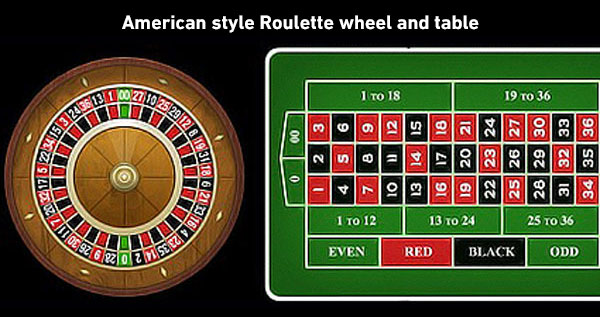

RETO: Usando las 10 ruletas y con todos los intentos que quieran, creén un método para ganar 1,000,000  empezando con 128.

Pista: Pueden elegir la cantidad apostada en cada juego. 

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def ruletas(cuenta:int, numeros:list, apuestas:list):
  '''
  Funcion que simula las 10 ruletas y nos retorna si en alguna de ellas se ganó
  Entrada:
    cuenta.- Es la cantidad que se tiene disponible para apostar
    numeros.- Es una lista de 10 numeros los cuales son las casillas a apostar de cada ruleta
    apuestas.- Es una lista de 10 número los cuales son los montos apostados a cada ruleta
  
  Salida:
    cuenta.- Es el monto de dinero con el cual se cuenta actualmente
  '''
  # print(f'Cuenta antes de la apuesta: {cuenta}')

  #Quitamos las apuestas de la cuenta
  monto_apostado = sum(apuestas)
  cuenta = cuenta - monto_apostado
  

  #Aleatoriamente obtenemos los resultados de las 10 ruletas
  resultados = [random.randint(1, 38) for _ in range(10)] 

  #Si la canica cae en la casilla 1 o 2, todos pierden
  if 1 in resultados or 2 in resultados:
    # print('***La casa gana***\n')
    return cuenta
  
  #Verificamos si en alguna ruleta se gano
  for ruleta in range(10):
    if resultados[ruleta] == numeros[ruleta]:
      cuenta += 37*apuestas[ruleta]
      # print(f'En la ruleta número {ruleta + 1} se ganó un monto de {37*apuestas[ruleta]}')
  
  # print(f'Cuenta despues de la apuesta: {cuenta}\n')
  return cuenta

La estrategia será apostar $\$1$ a cada ruleta hasta que se tengan en la cuenta $\$1000$. A partir de ese momento se empezará a apostar $\$2$ hasta llegar a los $\$2000$ y así sucesivamente.

Lo numero a apostar serán del 3 al 12. Debido a que el lanzamiento de las canicas en cada ronda son eventos independientes, entonces no importa a qué numeros apostemos.

# Estrategia Fibonacci

Vamos a hacer simulaciones siguiendo la estrategia de Fibonacci.

Al principio se apuestan 1 peso a cada ruleta. Si se gana entonces se sigue apostando un peso, pero si se pierde entonces se apostaran $\$2$.

Cada vez que perdamamos vamos a ir aume ntando el monto apostado una unidad en la sucesión de Fibonacci. Si ganamos, entonces vamos a retroceder la apuesta dos lugares en la sucesión.

Por ejemplo, si hemos perdido 5 veces consecutivas entonces el monto de nuestra siguiente apuesta será $\$13$. Si volvemos a perder entonces aumentamos la apuesta a $\$21$, pero si ganamos entonces vamos a retroceder al monto de $\$5$

Dado que tenemos como límite $\$2048$, entonces vamos a ir escalando las apuestas.

Si tenemos menos de $\$1000$ en la cuenta, entonces vamos a multiplicar las apuestas por 1

Si tenemos más de 500, entonces vamos a escalar las apuestas por 200. Si es más es 1000 la escala va a ser de 500. Si es más de 13000 la escala es de 800. Si es más de 1500 la escala es de 1000 y finalmente si es más de 10000 le corresponde la escala de 2000

Para poder asegurarnos que no sobrepasamos el monto máximo de apuestas vamos a usar un condicinal que indique que si superamos los $\$2048$ entonces que ya no suba la apuesta, que se quede en $\$2048$. Además agregamos un último condicional para verificar que no estemos apostando más de la cantidad que tenemos disponible

Por último vamos a graficar un histograma del histórico de la cuenta, es decir, los movimientos que ha tenido para poder ver si en algun momento una simulación llegó a superar el millon de pesos

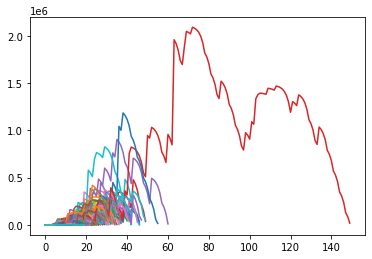

In [ ]:
for i in range(100000):
  #Inicializamos la cuenta con 128
  cuenta = 128
  #Este es el arreglo que contiene las apuestas de cada ruleta
  apuesta = np.array([1 for i in range(10)])
  #Lista con los primeros terminos de la sucesion de Fibonacci
  fibo = [1, 2, 3, 5, 8, 13, 21, 34, 55]
  #Indice que nos dice en que numero de la sucesion estamos
  fibo_apuesta = 0
  #Historico de la cuenta
  lista_cuenta = [128]
  escala = 1

  #Mientras aun tengamos dinero en la cuenta, vamos a seguir apostando
  while 0 < cuenta:
    #Lista que seran los numeros a los cuales vamos a apostar
    numeros = [random.randint(3, 38) for _ in range(10)]
    #Jugamos a la ruleta
    cuenta = ruletas(cuenta, numeros, apuesta)

    #Se va actualizando la escala
    if cuenta < 0:
      break
    elif cuenta < 500:
      escala = 1
    elif cuenta > 500:
      escala = 200
    elif cuenta > 1000:
      escala = 500
    elif cuenta > 1300:
      escala = 800
    elif cuenta > 1500:
      escala = 1000
    elif cuenta > 10000:
      escala = 2000
    
    #Vamos agregando el resultado de la apuesta
    lista_cuenta.append(cuenta)

    #Si se pierde entonces pasamos al siguiente numero de la sucesion
    if lista_cuenta[-1] < lista_cuenta[-2] and fibo_apuesta < 8:
      fibo_apuesta += 1
      apuesta = np.array([1 for i in range(10)])*fibo[fibo_apuesta]*escala

    #Si ganamos, retrocedemos dos posiciones 
    else:
      if fibo_apuesta > 1:
        fibo_apuesta = fibo_apuesta - 2
        apuesta = np.array([1 for i in range(10)])*fibo[fibo_apuesta]*escala
      #Si estabamos apostando menos de 3 pesos, entonces regresamos a apostar 1 peso
      else:
          apuesta = np.array([1 for i in range(10)])*escala

  #Si la apuesta supera los $2048 entonces establecemos un limite
  if apuesta[0] > 2048:
    apuesta = np.array([1 for i in range(10)])*2048

  #Verificamos que el monto apostado no supere la cantidad de dinero que tenemos
  if sum(apuesta) > cuenta:
    apuesta =  np.array([1 for i in range(10)])
  plt.plot(lista_cuenta)

Podemos observar que, en color gris, hubo una simulación que superó el millon de pesos

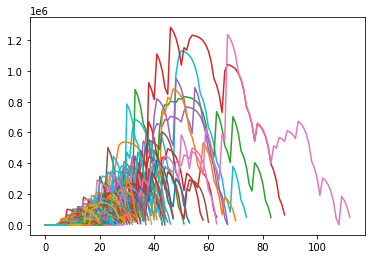

In [ ]:
for i in range(100000):
  #Inicializamos la cuenta con 128
  cuenta = 128
  #Este es el arreglo que contiene las apuestas de cada ruleta
  apuesta = np.array([1 for i in range(10)])
  #Lista con los primeros terminos de la sucesion de Fibonacci
  fibo = [1, 2, 3, 5, 8, 13, 21, 34, 55]
  #Indice que nos dice en que numero de la sucesion estamos
  fibo_apuesta = 0
  #Historico de la cuenta
  lista_cuenta = [128]
  escala = 1

  #Mientras aun tengamos dinero en la cuenta, vamos a seguir apostando
  while 0 < cuenta:
    #Lista que seran los numeros a los cuales vamos a apostar
    numeros = [random.randint(3, 38) for _ in range(10)]
    #Jugamos a la ruleta
    cuenta = ruletas(cuenta, numeros, apuesta)

    #Se va actualizando la escala
    if cuenta < 0:
      break
    elif cuenta < 500:
      escala = 1
    elif cuenta > 500:
      escala = 200
    elif cuenta > 1000:
      escala = 500
    elif cuenta > 1300:
      escala = 800
    elif cuenta > 1500:
      escala = 1000
    elif cuenta > 10000:
      escala = 2000
    
    #Vamos agregando el resultado de la apuesta
    lista_cuenta.append(cuenta)

    #Si se pierde entonces pasamos al siguiente numero de la sucesion
    if lista_cuenta[-1] < lista_cuenta[-2] and fibo_apuesta < 8:
      fibo_apuesta += 1
      apuesta = np.array([1 for i in range(10)])*fibo[fibo_apuesta]*escala

    #Si ganamos, retrocedemos dos posiciones 
    else:
      if fibo_apuesta > 1:
        fibo_apuesta = fibo_apuesta - 2
        apuesta = np.array([1 for i in range(10)])*fibo[fibo_apuesta]*escala
      #Si estabamos apostando menos de 3 pesos, entonces regresamos a apostar 1 peso
      else:
          apuesta = np.array([1 for i in range(10)])*escala

  #Si la apuesta supera los $2048 entonces establecemos un limite
  if apuesta[0] > 2048:
    apuesta = np.array([1 for i in range(10)])*2048

  #Verificamos que el monto apostado no supere la cantidad de dinero que tenemos
  if sum(apuesta) > cuenta:
    apuesta =  np.array([1 for i in range(10)])
  plt.plot(lista_cuenta)